In [1]:
# https://www.kaggle.com/asaumya/healthcare-dataset-stroke-data/downloads/healthcare-dataset-stroke-data.zip/1
# https://www.kaggle.com/surajdidwania/healthcare-stroke-patients-in-python/data
# https://www.kaggle.com/surajdidwania/healthcare-stroke-patients-in-python/data
# https://www.kaggle.com/rakesh786/eda-visualisation-prediction-of-storke-data

# others: https://www.kaggle.com/madhvi1811/heartdiseaseanalysis https://www.kaggle.com/wakanama/basic-prediction-model
# https://www.kaggle.com/jonasalmeida/2015-deidentified-ny-inpatient-discharge-sparcs/kernels

import numpy as np 
import pandas as pd # data processing, reading files 
import matplotlib.pyplot as plt # plotting and visulisation
import seaborn as sns # easier visulisation
import sklearn, sklearn.decomposition, sklearn.manifold

%load_ext autoreload
%autoreload 2


In [2]:
#

In [3]:
# setting up data paths, loading data

data_dir = './healthcare-dataset-stroke-data'
file_name_train = 'train_2v_lc.csv'
file_name_test  = 'test_2v_lc.csv'

df_train = pd.read_csv('{}/{}'.format(data_dir,file_name_train))
df_test  = pd.read_csv('{}/{}'.format(data_dir,file_name_test))

original_columns_train = df_train.columns.values
original_columns_test  = df_test.columns.values

In [4]:
#


In [5]:
df_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,male,3.0,0,0,no,children,rural,95.12,18.0,NaN,0
1,30468,male,58.0,1,0,yes,private,urban,87.96,39.2,never,0
2,16523,female,8.0,0,0,no,private,urban,110.89,17.6,NaN,0
3,56543,female,70.0,0,0,yes,private,rural,69.04,35.9,formerly,0
4,46136,male,14.0,0,0,no,never_worked,rural,161.28,19.1,NaN,0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [7]:
df_train['gender'].head(5)

0      male
1      male
2    female
3    female
4      male
Name: gender, dtype: object

In [8]:
df_train['age'].mean()

42.21789400921646

In [9]:
df_train.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [10]:
#

In [11]:
df_train['smoking_status'].head(5)

0         NaN
1       never
2         NaN
3    formerly
4         NaN
Name: smoking_status, dtype: object

In [12]:
#


In [13]:
df_train['smoking_status'].isnull().sum()

13292

In [14]:
df_train.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [15]:
(df_train.isnull().sum()/len(df_train)).sort_values(ascending=False)

smoking_status       0.306267
bmi                  0.033687
stroke               0.000000
avg_glucose_level    0.000000
residence_type       0.000000
work_type            0.000000
ever_married         0.000000
heart_disease        0.000000
hypertension         0.000000
age                  0.000000
gender               0.000000
id                   0.000000
dtype: float64

In [16]:
(df_test.isnull().sum()/len(df_test)).sort_values(ascending=False)

smoking_status       0.309177
bmi                  0.031772
avg_glucose_level    0.000000
residence_type       0.000000
work_type            0.000000
ever_married         0.000000
heart_disease        0.000000
hypertension         0.000000
age                  0.000000
gender               0.000000
id                   0.000000
dtype: float64

In [17]:
#

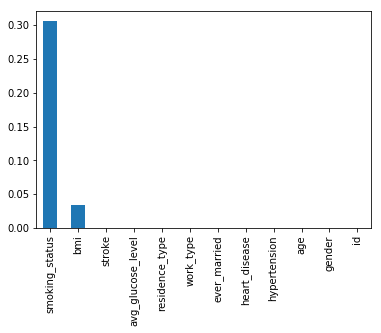

In [18]:
percentage_missing_train = (df_train.isnull().sum()/len(df_train)).sort_values(ascending=False)
percentage_missing_train.plot.bar()


In [19]:
#

In [20]:
#

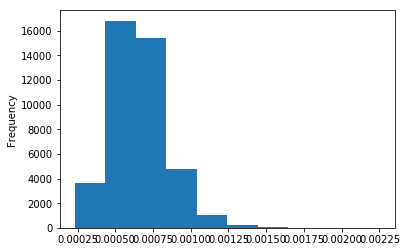

In [21]:
(df_train['bmi']/len(df_train['bmi'])).plot.hist()



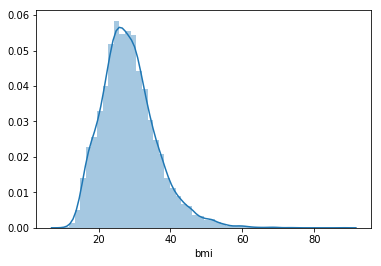

In [22]:

sns.distplot(df_test['bmi'][df_test['bmi'].notna()])

In [23]:
#

In [24]:
#

In [25]:
import plotHelpers



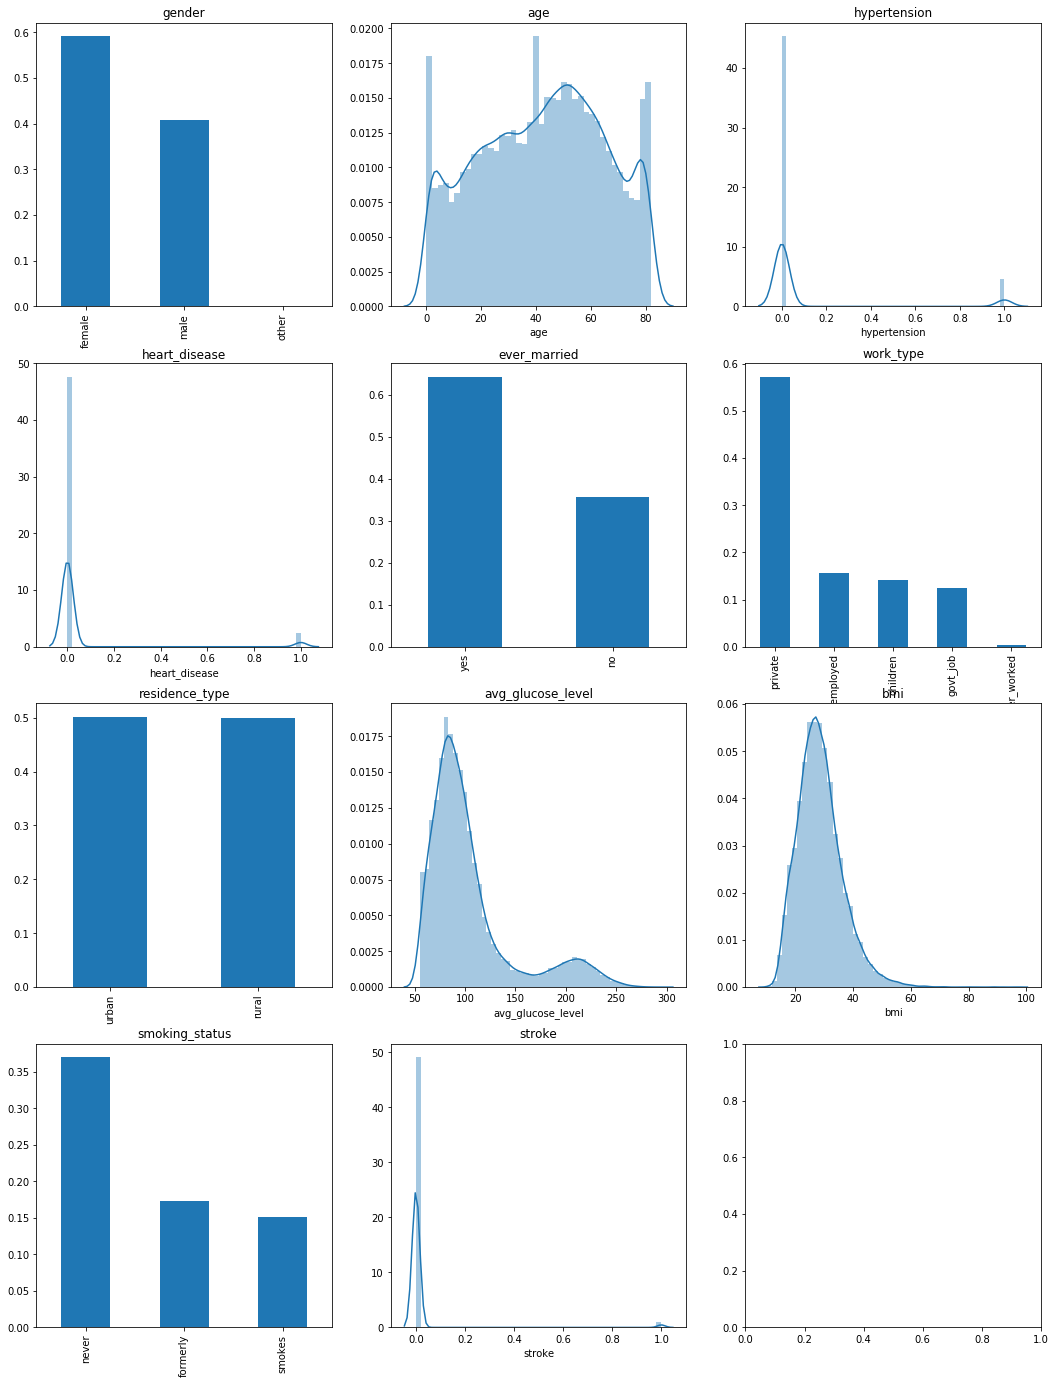

In [26]:
plotHelpers.plot_histograms(df_train)

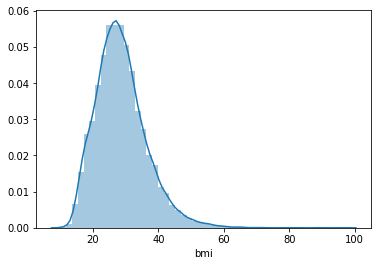

In [27]:
# handling missing values
sns.distplot(df_train['bmi'][df_train['bmi'].notnull()])



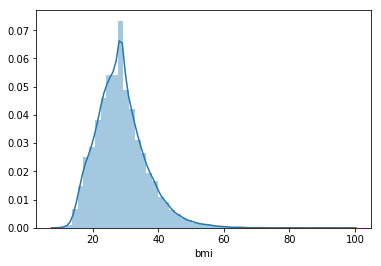

In [28]:
# simple
# take mean of bmi


df_train['bmi'] = df_train['bmi'].fillna(df_train['bmi'].mean())
df_test['bmi'] = df_test['bmi'].fillna(df_test['bmi'].mean())
sns.distplot(df_train['bmi'][df_train['bmi'].notnull()])

# potentially fill missing smoking status
df_train['smoking_status'] = df_train['smoking_status'].fillna('missing')
df_test['smoking_status'] = df_test['smoking_status'].fillna('missing')




In [29]:
#


In [30]:
# Handling Categorical Variables

df_train_enc = df_train.copy()

# use one-hot-encoding for later
for cat_column in ['gender','ever_married','work_type','residence_type','smoking_status']:
    df_train_enc = df_train_enc.join(pd.get_dummies(df_train_enc[cat_column],prefix=cat_column))
    df_train_enc = df_train_enc.drop(cat_column)




# just convert to numerical 
encoders = {}
#encoder['gender'] = sklearn.preprocessing.LabelEncoder()
#df_train['gender'] = encoder['gender'].fit_transform(df_train['gender'])

#for cat_column in ['gender','ever_married','work_type','Residence_type']:
for cat_column in ['gender','ever_married','work_type','residence_type','smoking_status']:
    encoders[cat_column] = sklearn.preprocessing.LabelEncoder()
    df_train[cat_column] = encoders[cat_column].fit_transform(df_train[cat_column])
    df_test[cat_column]  = encoders[cat_column].fit_transform(df_test[cat_column])


   



KeyError: "['gender'] not found in axis"

In [31]:
#encoders['gender'].inverse_transform(df_train['gender'])
encoders['residence_type'].inverse_transform(df_train['residence_type'])

array(['rural', 'urban', 'urban', ..., 'urban', 'urban', 'urban'],
      dtype=object)

In [32]:
#

In [33]:
#

In [34]:
df_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,...,work_type_govt_job,work_type_never_worked,work_type_private,work_type_self_employed,residence_type_rural,residence_type_urban,smoking_status_formerly,smoking_status_missing,smoking_status_never,smoking_status_smokes
0,30669,1,3.0,0,0,0,0,0,95.12,18.0,...,0,0,0,0,1,0,0,1,0,0
1,30468,1,58.0,1,0,1,3,1,87.96,39.2,...,0,0,1,0,0,1,0,0,1,0
2,16523,0,8.0,0,0,0,3,1,110.89,17.6,...,0,0,1,0,0,1,0,1,0,0
3,56543,0,70.0,0,0,1,3,0,69.04,35.9,...,0,0,1,0,1,0,1,0,0,0
4,46136,1,14.0,0,0,0,2,0,161.28,19.1,...,0,1,0,0,1,0,0,1,0,0


In [35]:
df_train.corr('pearson')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,...,work_type_govt_job,work_type_never_worked,work_type_private,work_type_self_employed,residence_type_rural,residence_type_urban,smoking_status_formerly,smoking_status_missing,smoking_status_never,smoking_status_smokes
id,1.000000,0.001657,0.012760,0.006571,0.009234,0.010217,0.020073,0.000120,0.024634,0.018382,...,-0.001452,0.003553,0.009300,0.008338,-0.000120,0.000120,0.006968,-0.019341,0.004116,0.011988
gender,0.001657,1.000000,-0.027903,0.023709,0.082061,-0.031351,-0.066451,0.001508,0.035465,-0.021570,...,-0.013346,0.002664,-0.051902,-0.003172,-0.001508,0.001508,0.039412,0.056878,-0.104443,0.025986
age,0.012760,-0.027903,1.000000,0.272169,0.250188,0.693070,0.556407,0.001299,0.237627,0.352236,...,0.115651,-0.069509,0.143657,0.326913,-0.001299,0.001299,0.244646,-0.382096,0.113898,0.080043
hypertension,0.006571,0.023709,0.272169,1.000000,0.119777,0.176575,0.124502,-0.003124,0.160211,0.153779,...,0.020065,-0.019319,0.007236,0.100243,0.003124,-0.003124,0.071775,-0.121995,0.040298,0.026940
heart_disease,0.009234,0.082061,0.250188,0.119777,1.000000,0.128833,0.102602,-0.002743,0.146938,0.054133,...,-0.002441,-0.014292,-0.006327,0.099342,0.002743,-0.002743,0.083395,-0.058163,-0.035606,0.034839
ever_married,0.010217,-0.031351,0.693070,0.176575,0.128833,1.000000,0.434064,0.004422,0.153607,0.337517,...,0.135298,-0.080734,0.158857,0.199305,-0.004422,0.004422,0.172053,-0.330836,0.103365,0.104869
work_type,0.020073,-0.066451,0.556407,0.124502,0.102602,0.434064,1.000000,-0.000810,0.104139,0.345118,...,-0.433193,-0.023623,0.469576,0.508820,0.000810,-0.000810,0.145634,-0.407983,0.181069,0.127287
residence_type,0.000120,0.001508,0.001299,-0.003124,-0.002743,0.004422,-0.000810,1.000000,0.000014,-0.003685,...,-0.000142,0.003089,0.006050,-0.007136,-1.000000,1.000000,-0.004288,-0.003314,0.000075,0.008687
avg_glucose_level,0.024634,0.035465,0.237627,0.160211,0.146938,0.153607,0.104139,0.000014,1.000000,0.184199,...,0.023014,-0.014516,0.008048,0.080246,-0.000014,0.000014,0.075054,-0.094472,0.012246,0.025871
bmi,0.018382,-0.021570,0.352236,0.153779,0.054133,0.337517,0.345118,-0.003685,0.184199,1.000000,...,0.093567,-0.021608,0.200884,0.081757,0.003685,-0.003685,0.119270,-0.275721,0.116958,0.071319


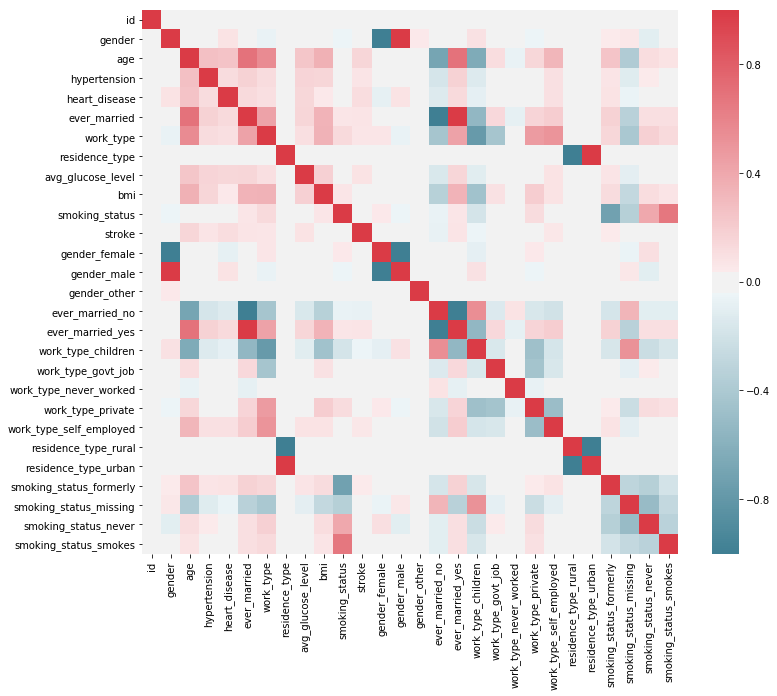

In [36]:
# use different color mapping for plotting
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# define size of the plot
fig, ax = plt.subplots(figsize=(12, 10))

# plot corelation as heatmap
sns.heatmap(df_train.corr('pearson'),ax=ax,cmap=cmap)



In [37]:
#

In [38]:
#

In [39]:
#

In [40]:
# dimensionality reduction (for plotting)




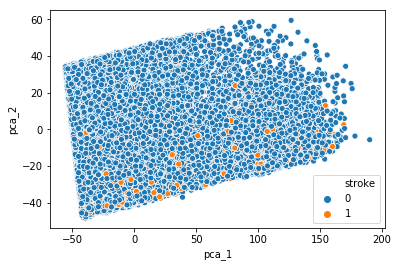

In [77]:
# using PCA
df_train_pca = df_train.copy()

#columns_to_use = ['gender', 'age', 'hypertension', 'heart_disease','ever_married', 'work_type', 'Residence_type', 
#    'avg_glucose_level','bmi', 'smoking_status']
columns_to_use = ['age', 'avg_glucose_level','bmi']


pca_on_train = sklearn.decomposition.PCA(n_components=2)
pca_on_train.fit(df_train_pca[columns_to_use])
train_pcs = pca_on_train.transform(df_train_pca[columns_to_use])

df_train_pca['pca_1'] = train_pcs[:,0]
df_train_pca['pca_2'] = train_pcs[:,1]

fig, ax = plt.subplots(figsize=(12, 10))
sns.scatterplot(x='pca_1',y='pca_2',hue='stroke',data=df_train_pca,ax=ax)


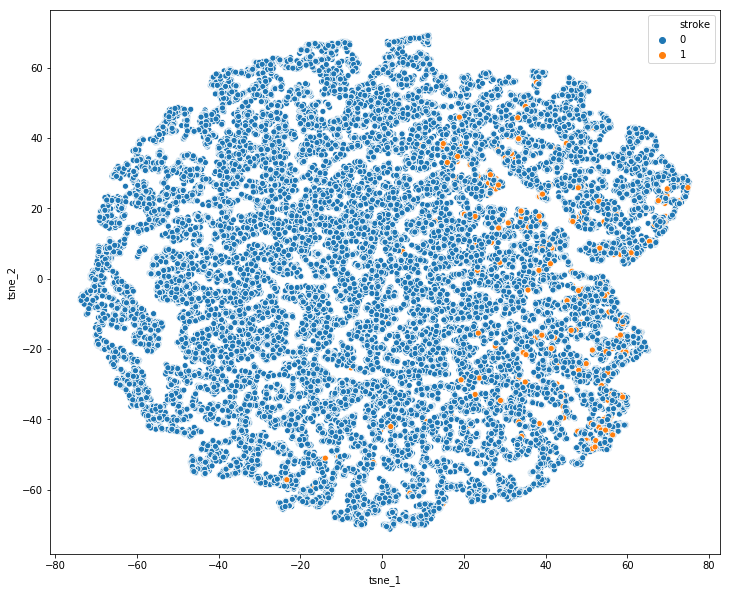

In [88]:
# using tSNE
df_train_tsne = df_train.copy()


columns_to_use = ['gender', 'age', 'hypertension', 'heart_disease','ever_married', 'work_type', 'Residence_type', 
    'avg_glucose_level','bmi', 'smoking_status']

columns_to_use = ['age', 'avg_glucose_level','bmi']


tsne_on_train = sklearn.manifold.TSNE(n_components=2,n_iter=1000)

#tsne_on_train.fit(df_train[columns_to_use])
#train_tsne = tsne_on_train.fit_transform(sklearn.preprocessing.scale(df_train_tsne[columns_to_use]))
train_tsne = tsne_on_train.fit_transform(df_train_tsne[columns_to_use])


df_train_tsne['tsne_1'] = pd.Series(train_tsne[:,0])
df_train_tsne['tsne_2'] = pd.Series(train_tsne[:,1])

fig, ax = plt.subplots(figsize=(12, 10))
sns.scatterplot(x='tsne_1',y='tsne_2',hue='stroke',data=df_train_tsne,ax=ax)



In [47]:
#




In [48]:
# simple prediction model

In [49]:
# linear regression

In [50]:
df_train[:5000]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,pca_1,pca_2
0,30669,1,3.00,0,0,0,4,0,95.12,18.000000,1,0,-16.104776,38.086656
1,30468,1,58.00,1,0,1,2,1,87.96,39.200000,2,0,-13.276629,-19.482576
2,16523,0,8.00,0,0,0,2,1,110.89,17.600000,1,0,0.251463,35.859762
3,56543,0,70.00,0,0,1,2,0,69.04,35.900000,0,0,-30.070531,-34.017316
4,46136,1,14.00,0,0,0,1,0,161.28,19.100000,1,0,50.963339,38.279921
5,32257,0,47.00,0,0,1,2,1,210.95,50.100000,1,0,106.534795,10.704992
6,52800,0,52.00,0,0,1,2,1,77.59,17.700000,0,0,-25.303147,-12.821327
7,41413,0,75.00,0,1,1,3,0,243.53,27.000000,2,0,142.386587,-8.463265
8,15266,0,32.00,0,0,1,2,0,77.67,32.300000,3,0,-27.970312,5.037850
9,28674,0,74.00,1,0,1,3,1,205.84,54.600000,2,0,106.122148,-17.086406


In [62]:
sklearn.preprocessing.scale(df_train_tsne[columns_to_use])

array([[-1.79963321, -1.41333478],
       [ 0.69790474,  1.23686262],
       [-1.57258431, -1.4633385 ],
       ...,
       [ 1.65151014, -0.47576494],
       [ 0.01675803,  0.14928161],
       [ 0.60708518, -0.78828822]])

In [32]:
df_train_enc

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_female,gender_male,gender_other
0,30669,male,3.0,0,0,no,children,rural,95.12,18.000000,missing,0,0,1,0
1,30468,male,58.0,1,0,yes,private,urban,87.96,39.200000,never,0,0,1,0
2,16523,female,8.0,0,0,no,private,urban,110.89,17.600000,missing,0,1,0,0
3,56543,female,70.0,0,0,yes,private,rural,69.04,35.900000,formerly,0,1,0,0
4,46136,male,14.0,0,0,no,never_worked,rural,161.28,19.100000,missing,0,0,1,0
5,32257,female,47.0,0,0,yes,private,urban,210.95,50.100000,missing,0,1,0,0
6,52800,female,52.0,0,0,yes,private,urban,77.59,17.700000,formerly,0,1,0,0
7,41413,female,75.0,0,1,yes,self_employed,rural,243.53,27.000000,never,0,1,0,0
8,15266,female,32.0,0,0,yes,private,rural,77.67,32.300000,smokes,0,1,0,0
9,28674,female,74.0,1,0,yes,self_employed,urban,205.84,54.600000,never,0,1,0,0


In [33]:
df_train_enc.drop(cat_column)

KeyError: "['gender'] not found in axis"